# 1. Define the problem
    Predict survival on the Titanic

In [1]:
#import Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Collecting the data
    training dataset and testing dataset are given by Kaggle

In [2]:
train = pd.read_csv('titanic_input/train.csv')
test = pd.read_csv('titanic_input/test.csv')

# 3. Exploratory Data Analysis
1) Data Size Analysis=
2) Check data info
3) Verifying NULL Data
4) 5number summary
5) Correlation analysis of data with visualization
    - numerical data
    - categorical data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#no 'Survived' feature
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


----------------------------------------
- Survival
  - 0 = No, 1 = Yes
- pclass
  - Ticket class
  - 1 = 1st, 2 = 2nd, 3 = 3rd		
- sibsp
  - a of siblings/spouses aboard the Titanic
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)	
- parch
  - a of parents/children aboard the Titanic
  - The dataset defines family relations in this way...	
- ticket
  - Ticket number	
- fare
  - Passenger fare	
- cabin
  - Cabin number	
- embarked
  - Port of Embarkation
  - C = Cherbourg, Q = Queenstown, S = Southampton
- ----------------------------------------

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

cabin, age was lost

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


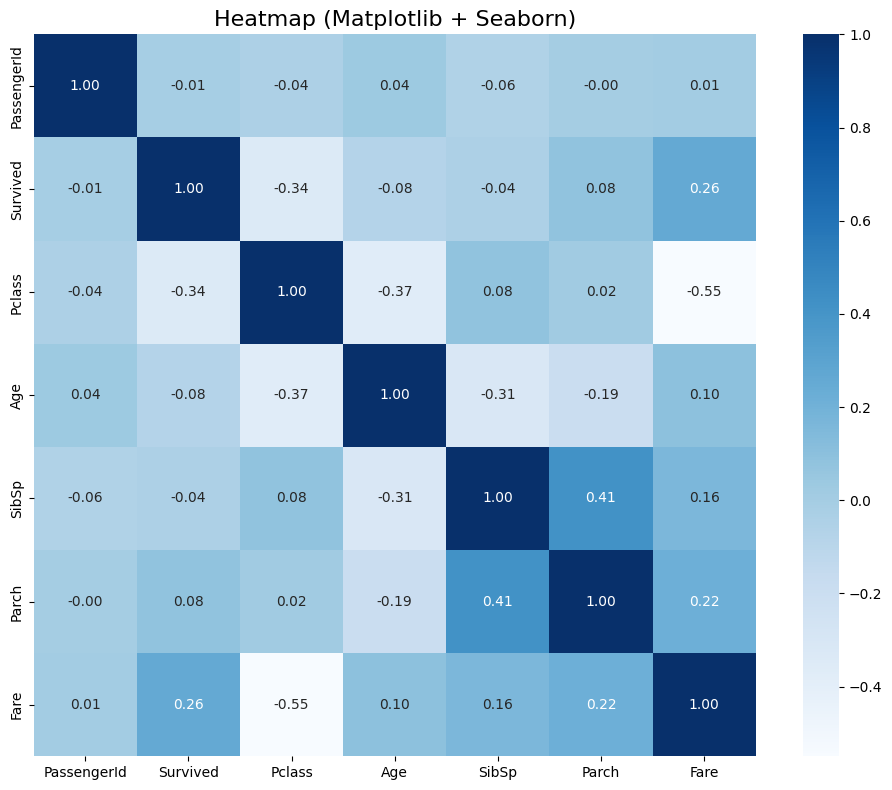

In [12]:
# 숫자형 데이터에 대해서만 상관관계 계산
corr_matrix = train.corr(numeric_only=True)

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,          # 셀 안에 상관계수 숫자 표시
    fmt=".2f",           # 소수점 둘째 자리까지 표시
    cmap="Blues",        # 색상 스케일
    square=True,         # 정사각형 셀 유지
    cbar=True            # 컬러바 표시
)
plt.title("Heatmap (Matplotlib + Seaborn)", fontsize=16)
plt.tight_layout()
plt.show()

-----------------------
## Bar Chart for Categorical Features

* Pclass
* Sex
* Embarked
* age
* SibSp 
* Parch
* Fare

In [13]:
%matplotlib inline
sns.set() # setting seaborn default for plots

In [14]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='barh', stacked=True, figsize=(10, 5))

In [15]:
def histogram(feature, a):
    plt.figure(figsize=(10, 6))
    
    sns.histplot(
        data=train,
        x=feature,
        hue='Survived',
        bins=a,
        kde=False,
        element='step',    
        stat='count',
        palette='Set2',
        common_norm=False,
        alpha=0.4 
    )
    
    plt.title(f'{feature} by Survival')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Survival Status', labels=['Survived (1)', 'Not Survived (0)'])
    plt.tight_layout()
    plt.show()


## categorical data
* Pclass
* Sex
* Embarked

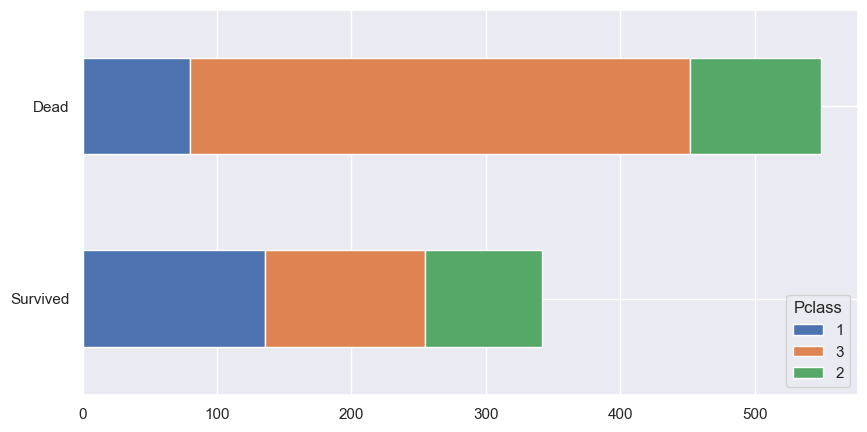

In [16]:
bar_chart('Pclass')

- Pcalss is affects survival
- 2nd Pclass has the highest survival rate.
- 3rd has the smallest survival rate


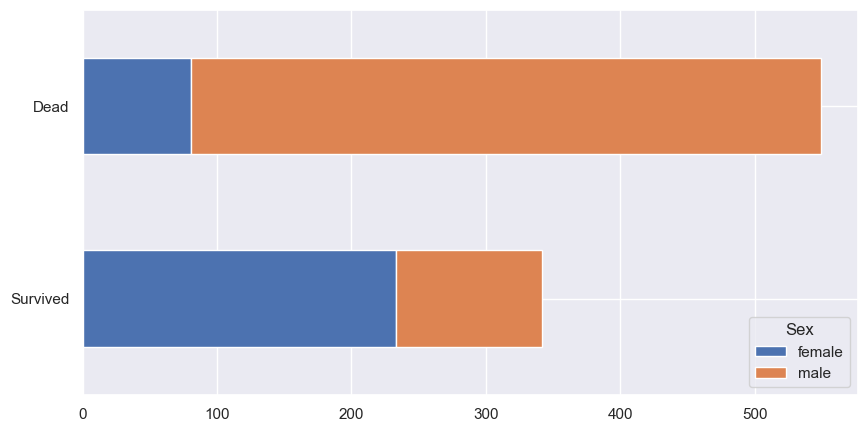

In [17]:
bar_chart('Sex')

- Female have a higher survival rate than male.

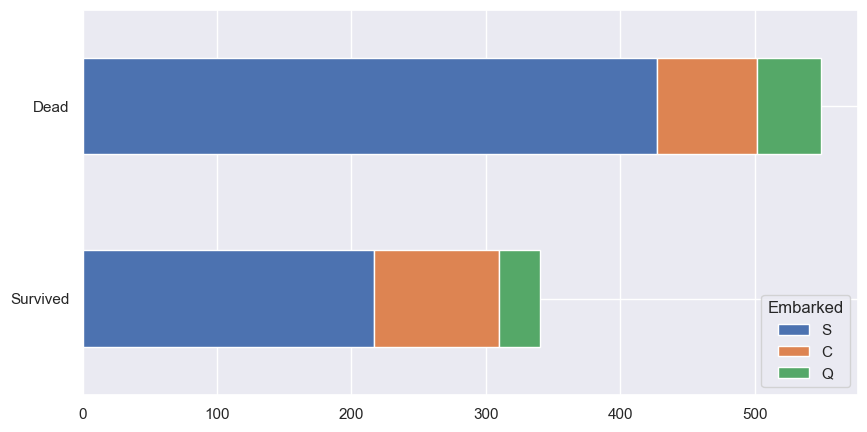

In [18]:
bar_chart('Embarked')

- Survival rate is in the order of C, Q, and S, with S being the most common.

## numerical data
* age
* SibSp 
* Parch
* Fare

In [19]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

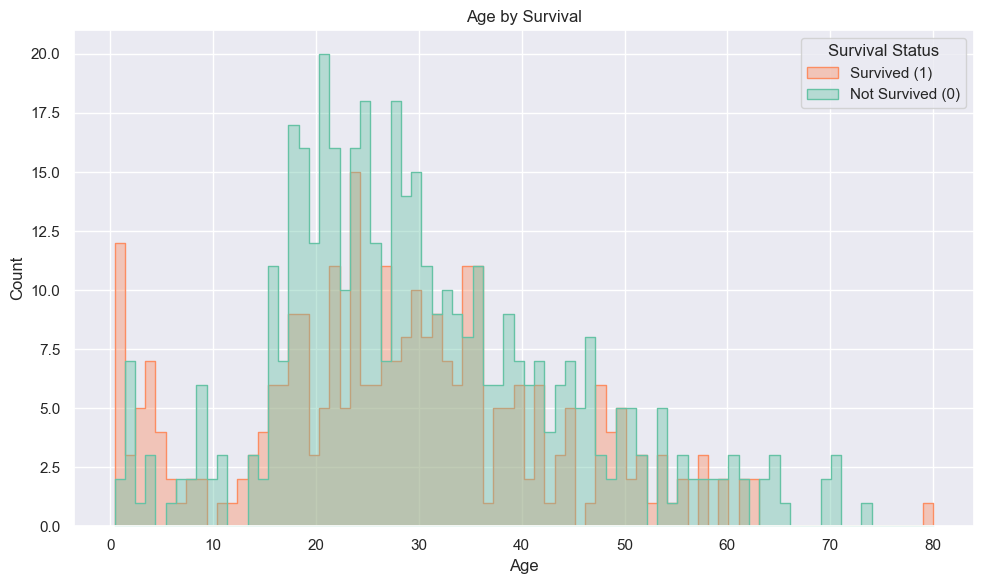

In [20]:
histogram('Age',80)

- Missing value is 177 so cannot be determined
----------------

In [21]:
train['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

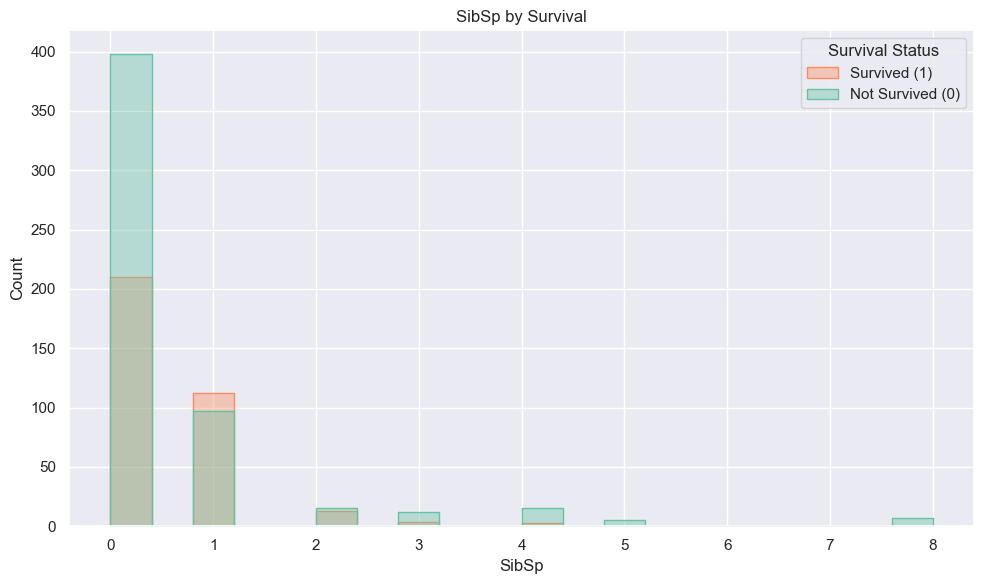

In [22]:
histogram('SibSp',20)

- Survival rate is higher when you have a siblings/spouses(one or two) than when you are alone(0)
- ----------

In [23]:
train['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

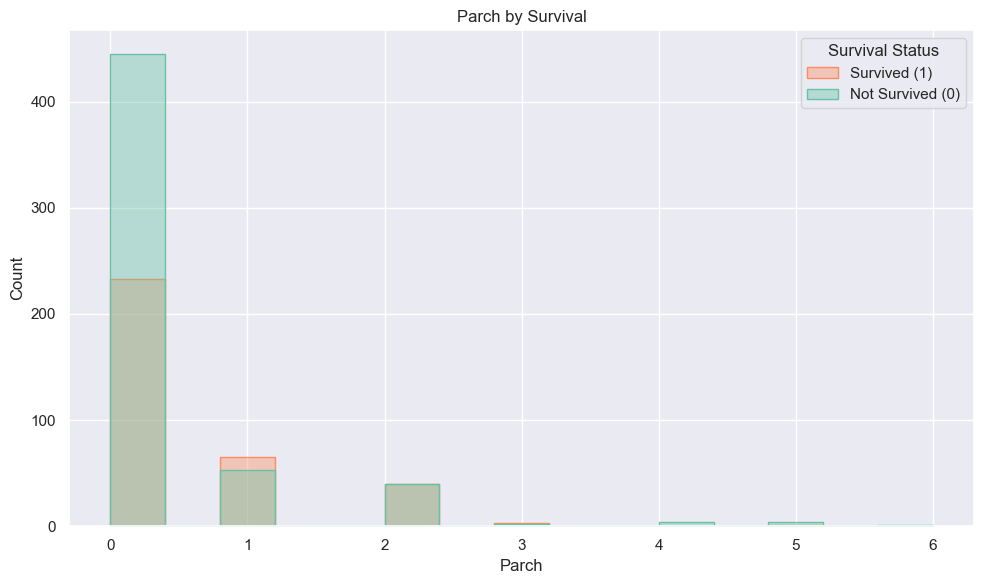

In [24]:
histogram('Parch', 15)

- Survival rate is higher when you have a parents/children(one or two) than when you are alone(0)
- This is similar to SibSp.
------------

In [25]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

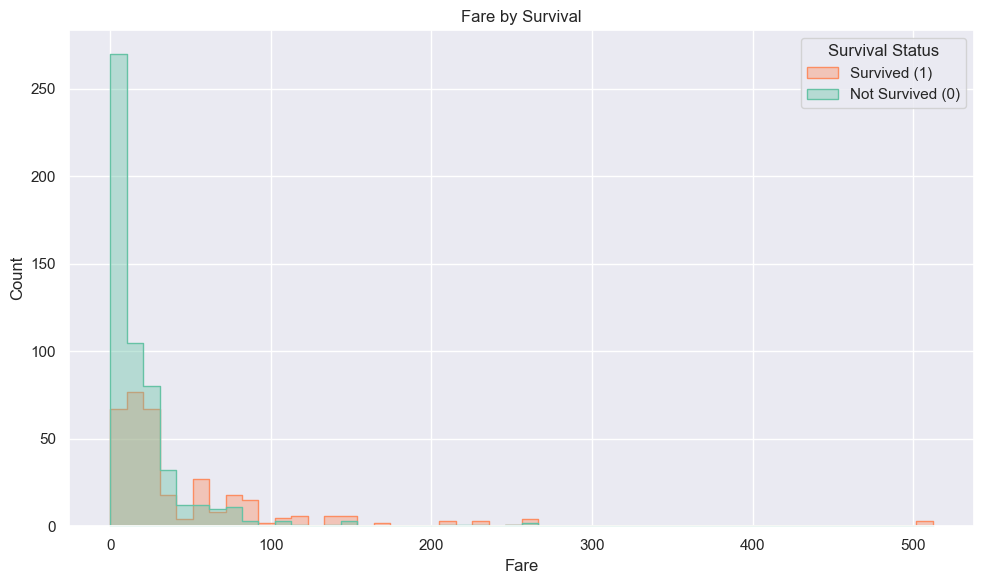

In [26]:
histogram('Fare', 50)

- Fare가 50이상일때에 생존율이 높음.
- --------------------

# 4. Data Preprocessing & Feature Engineering

In [27]:
train_test_data = [train, test] # combining train and test dataset

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Pclass(변환X)
- Name
- Sex
- Age
- SibSp & Parch
- Ticket
- Fare
- Cabin
- Embarked

-------------
## 4.1 NAME

In [29]:

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [31]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [32]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

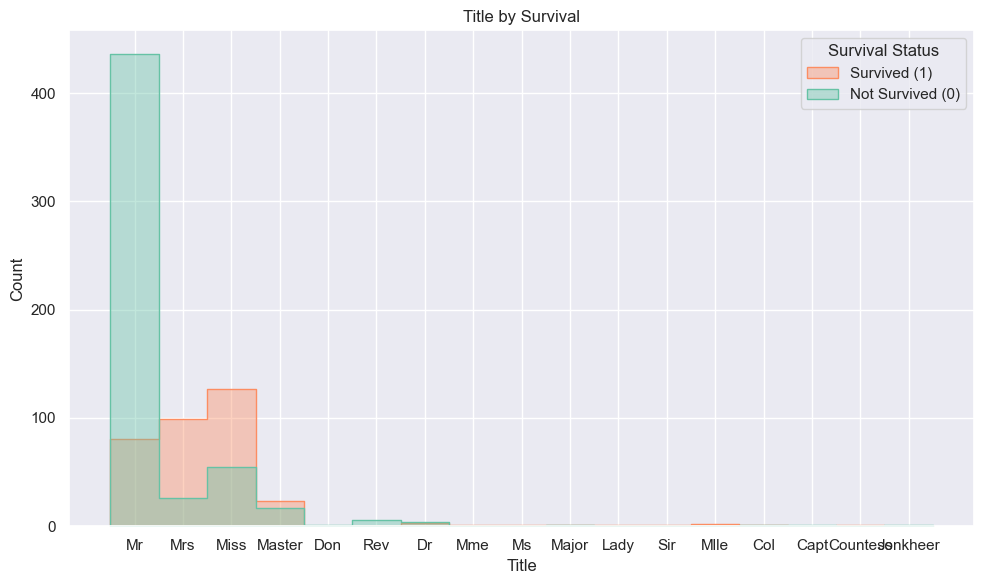

In [33]:
histogram('Title',20)

### Title map
- Mr : 0
- Miss : 1
- Mrs: 2
- Master: 3
- Others: 4

In [34]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [35]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


- "Mrs" and "Master" have a very high survival rate.

- They are considered the first to be rescued.

In [36]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

-------------
## 4.2 Sex

In [37]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [38]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [39]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

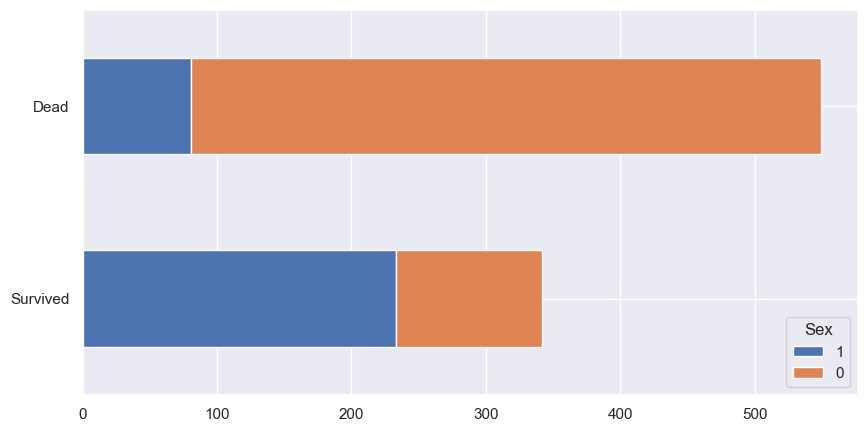

In [40]:
bar_chart('Sex')

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [42]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


----------------------
## 4.3 Age

---------------
### 4.3.1 filling missing values

In [43]:
print(train.isna().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Title            0
dtype: int64


In [44]:
print(test.isna().sum().sort_values(ascending=False))

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
Title            0
dtype: int64


- "Age" has missing value

In [45]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Master, Others)
train["Age"] = train["Age"].fillna(train.groupby("Title")["Age"].transform("median"))
test["Age"] = test["Age"].fillna(test.groupby("Title")["Age"].transform("median"))


In [46]:
print(train.isna().sum().sort_values(ascending=False))

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Title            0
dtype: int64


In [47]:
print(test.isna().sum().sort_values(ascending=False))

Cabin          327
Fare             1
PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
Title            0
dtype: int64


------------
### 4.3.2 Classifier
- Classifies the age value because the age value is regression.

In [48]:
from scipy.stats import gaussian_kde

def plot_kde(train, feature):
    plt.figure(figsize=(10, 6))

    for label, color in zip([1, 0], ['red', 'blue']):
        data = train[train['Survived'] == label][feature].dropna()

        if len(data) < 2:
            continue

        kde = gaussian_kde(data)
        x_vals = np.linspace(data.min(), data.max(), 500)
        y_vals = kde(x_vals)

        plt.fill_between(x_vals, y_vals, alpha=0.4, color=color,
                         label='Survived' if label == 1 else 'Dead')
        plt.plot(x_vals, y_vals, color=color)

    plt.title(f'Distribution of {feature} by Survival (KDE)')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Survival Status')
    plt.tight_layout()
    plt.show()

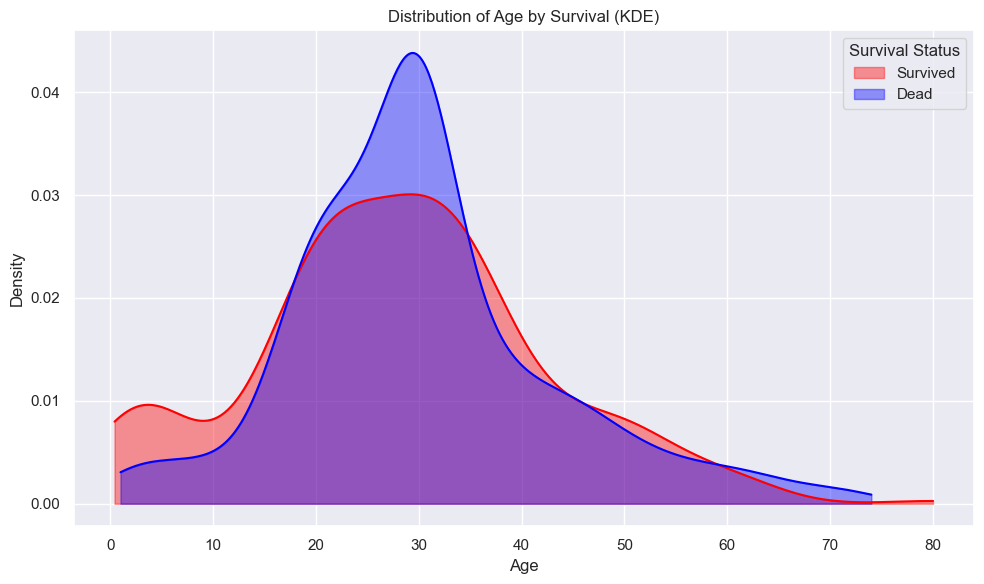

In [49]:
plot_kde(train,'Age')

In [50]:
#Randomly classify age values
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 18, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 27), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 35), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 57), 'Age'] = 3
    dataset.loc[dataset['Age'] > 57, 'Age'] = 4

In [51]:
train.head(20)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,1.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2


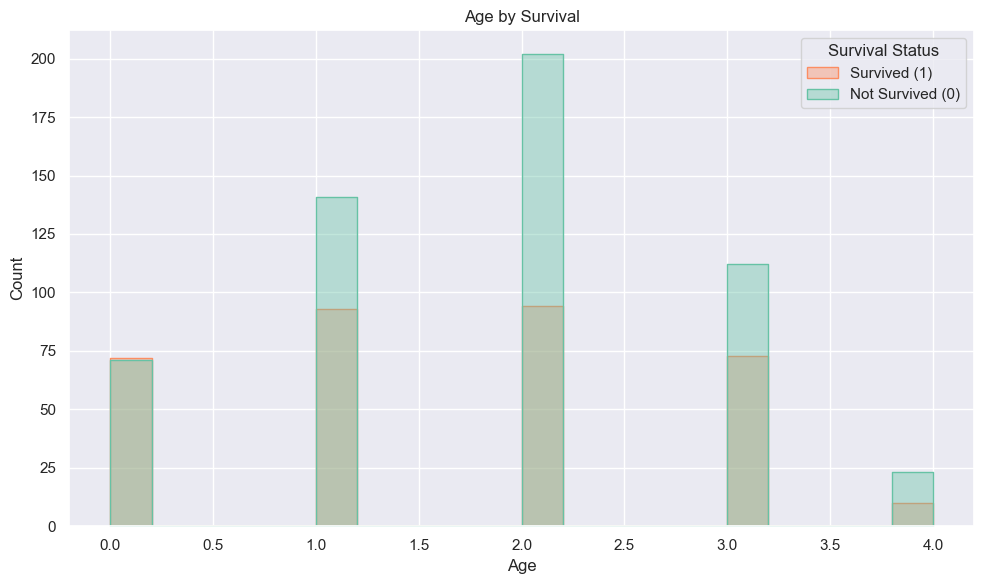

In [52]:
histogram('Age',20)

-------------
## 4.4 SibSp & Parch

In [53]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [54]:
train['FamilySize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

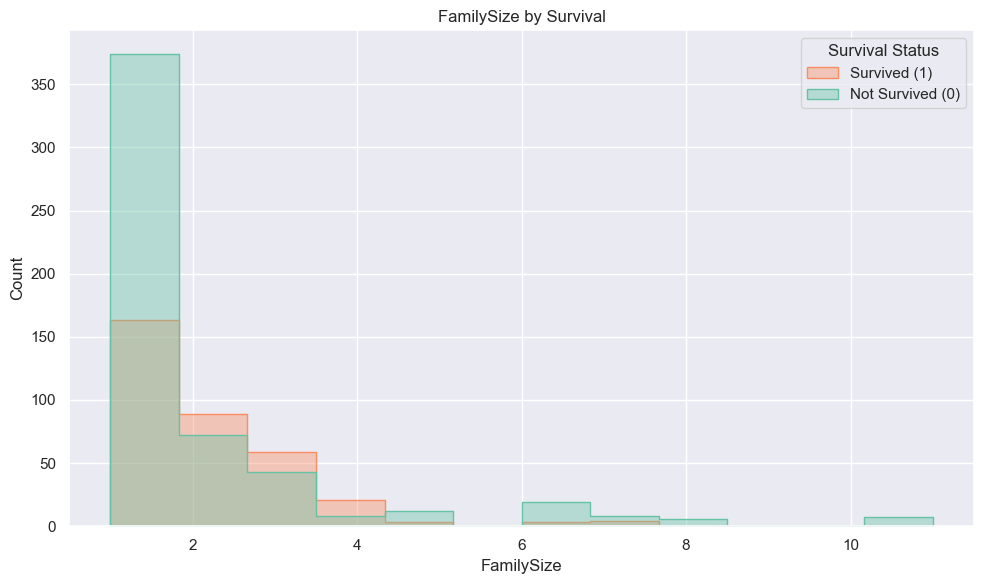

In [55]:
histogram('FamilySize',12)

In [56]:
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3,5
8,9,1,3,1,1.0,0,2,347742,11.1333,NaN,S,2,3
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2,2


In [57]:
features_drop = ['SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [58]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,1,3.0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,1,1.0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,1,2.0,113803,53.1000,C123,S,2,2
4,5,0,3,0,2.0,373450,8.0500,NaN,S,0,1
5,6,0,3,0,2.0,330877,8.4583,NaN,Q,0,1
6,7,0,1,0,3.0,17463,51.8625,E46,S,0,1
7,8,0,3,0,0.0,349909,21.0750,NaN,S,3,5
8,9,1,3,1,1.0,347742,11.1333,NaN,S,2,3
9,10,1,2,1,0.0,237736,30.0708,NaN,C,2,2


In [59]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,330911,7.8292,NaN,Q,0,1
1,893,3,1,3.0,363272,7.0000,NaN,S,2,2
2,894,2,0,4.0,240276,9.6875,NaN,Q,0,1
3,895,3,0,1.0,315154,8.6625,NaN,S,0,1
4,896,3,1,1.0,3101298,12.2875,NaN,S,2,3
5,897,3,0,0.0,7538,9.2250,NaN,S,0,1
6,898,3,1,2.0,330972,7.6292,NaN,Q,1,1
7,899,2,0,1.0,248738,29.0000,NaN,S,0,3
8,900,3,1,0.0,2657,7.2292,NaN,C,2,1
9,901,3,0,1.0,A/4 48871,24.1500,NaN,S,0,3


--------
## 4.5 Ticket

In [60]:
train = train.drop('Ticket', axis=1)
test = test.drop('Ticket', axis=1)

--------
## 4.6 Fare

### 4.6.1 fill in the missing value.

- fill missing Fare with median fare for each Pclass

In [61]:
train["Fare"] = train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"))
test["Fare"] = test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"))
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,7.2500,NaN,S,0,2
1,2,1,1,1,3.0,71.2833,C85,C,2,2
2,3,1,3,1,1.0,7.9250,NaN,S,1,1
3,4,1,1,1,2.0,53.1000,C123,S,2,2
4,5,0,3,0,2.0,8.0500,NaN,S,0,1
5,6,0,3,0,2.0,8.4583,NaN,Q,0,1
6,7,0,1,0,3.0,51.8625,E46,S,0,1
7,8,0,3,0,0.0,21.0750,NaN,S,3,5
8,9,1,3,1,1.0,11.1333,NaN,S,2,3
9,10,1,2,1,0.0,30.0708,NaN,C,2,2


### 4.6.2 Classifier

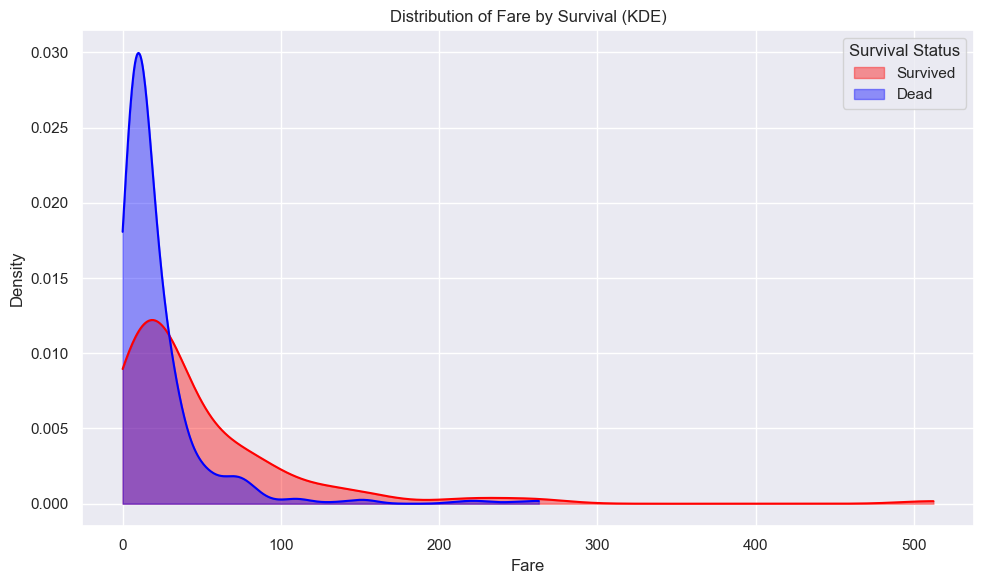

In [62]:
plot_kde(train,'Fare')

In [63]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 29, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 29) & (dataset['Fare'] <= 70), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 70) & (dataset['Fare'] <= 110), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 110, 'Fare'] = 3

In [64]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,NaN,S,0,2
1,2,1,1,1,3.0,2.0,C85,C,2,2
2,3,1,3,1,1.0,0.0,NaN,S,1,1
3,4,1,1,1,2.0,1.0,C123,S,2,2
4,5,0,3,0,2.0,0.0,NaN,S,0,1
5,6,0,3,0,2.0,0.0,NaN,Q,0,1
6,7,0,1,0,3.0,1.0,E46,S,0,1
7,8,0,3,0,0.0,0.0,NaN,S,3,5
8,9,1,3,1,1.0,0.0,NaN,S,2,3
9,10,1,2,1,0.0,1.0,NaN,C,2,2


## 4.7 Cabin


In [65]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

<Axes: >

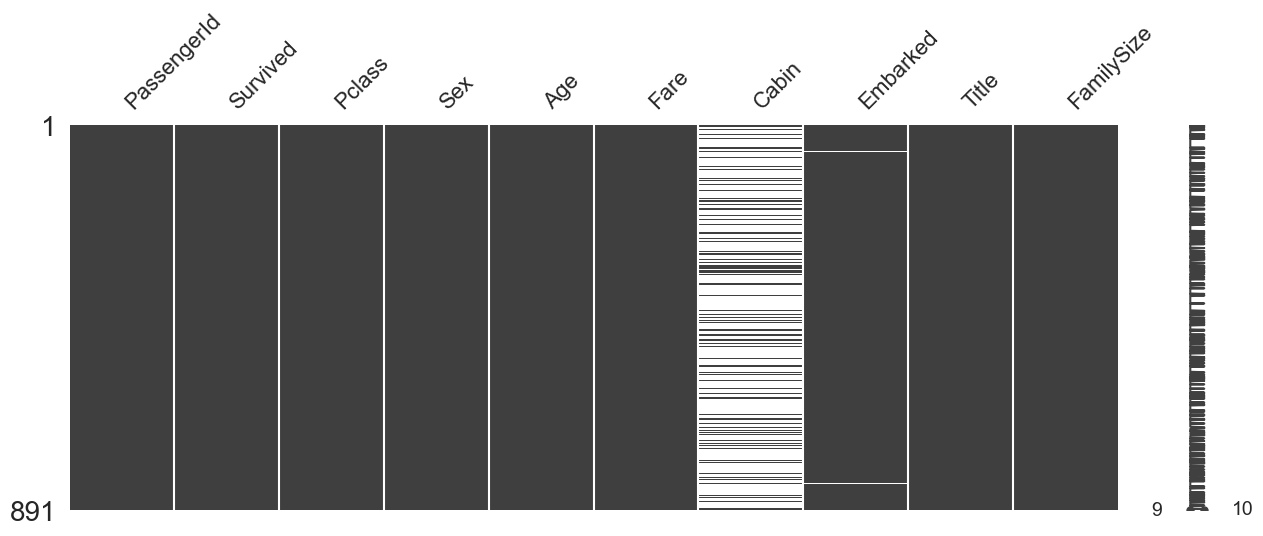

In [66]:
import missingno
missingno.matrix(train,figsize = (15,5))

- If it's the same letter, it's usually in the same position.

In [67]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else np.nan)

The Titanic's cabins are not just rooms but indicators of social and economic class. The upper class (1st class) had access to various cabins, while the lower class (3rd class) had limited options. Using Cabin and Pclass together is useful for survival prediction. In the actual Titanic ship layout, A represented the upper class, and G represented the lower class. This had an impact on survival rates, and in machine learning models, it's often reflected by assigning scores based on alphabetical order.

In [68]:
cabin_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [69]:
# 중앙값 계산 후 반올림하여 Cabin 결측값 채우기
train['Cabin'] = train.groupby('Pclass')['Cabin'].transform(
    lambda x: x.fillna(round(x.median()))
)
test['Cabin'] = test.groupby('Pclass')['Cabin'].transform(
    lambda x: x.fillna(round(x.median()))
)

<Axes: >

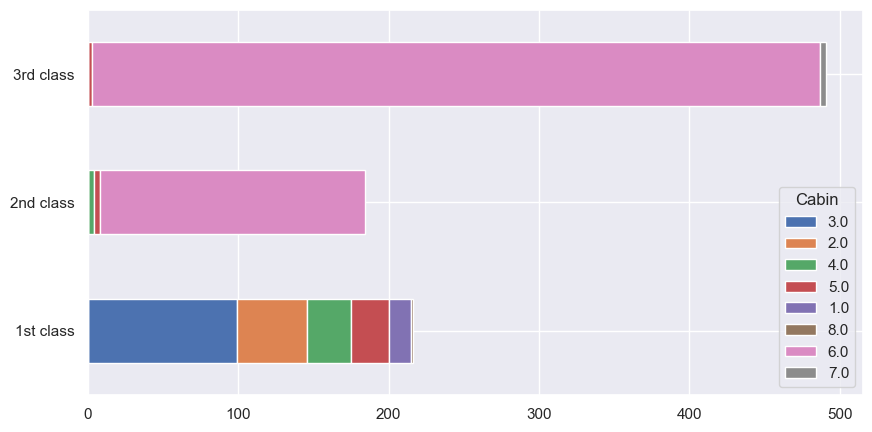

In [70]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='barh',stacked=True, figsize=(10,5))

In [71]:
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,6.0,S,0,2
1,2,1,1,1,3.0,2.0,3.0,C,2,2
2,3,1,3,1,1.0,0.0,6.0,S,1,1
3,4,1,1,1,2.0,1.0,3.0,S,2,2
4,5,0,3,0,2.0,0.0,6.0,S,0,1
5,6,0,3,0,2.0,0.0,6.0,Q,0,1
6,7,0,1,0,3.0,1.0,5.0,S,0,1
7,8,0,3,0,0.0,0.0,6.0,S,3,5
8,9,1,3,1,1.0,0.0,6.0,S,2,3
9,10,1,2,1,0.0,1.0,6.0,C,2,2


In [72]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,6.0,Q,0,1
1,893,3,1,3.0,0.0,6.0,S,2,2
2,894,2,0,4.0,0.0,6.0,Q,0,1
3,895,3,0,1.0,0.0,6.0,S,0,1
4,896,3,1,1.0,0.0,6.0,S,2,3


------------------
## 4.8 Embarked

In [73]:
train = train.drop(['Embarked'], axis=1)
test = test.drop(['Embarked'], axis=1)

- Embarked the place where you ride doesn't involve survival.

# 5. Modelling & Prediction

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Cabin        891 non-null    float64
 7   Title        891 non-null    int64  
 8   FamilySize   891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [76]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Title,FamilySize
0,1,0,3,0,1.0,0.0,6.0,0,2
1,2,1,1,1,3.0,2.0,3.0,2,2
2,3,1,3,1,1.0,0.0,6.0,1,1
3,4,1,1,1,2.0,1.0,3.0,2,2
4,5,0,3,0,2.0,0.0,6.0,0,1


In [77]:
train = train.drop(['PassengerId'], axis=1)

X = train.drop('Survived', axis=1)
y = train['Survived']

In [78]:
print(X.isna().sum())

Pclass        0
Sex           0
Age           0
Fare          0
Cabin         0
Title         0
FamilySize    0
dtype: int64


In [79]:
from sklearn.model_selection import KFold


k_fold = KFold(n_splits=11, shuffle=True, random_state=0)

scoring = 'accuracy'

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 5.1 RandomForestClassifier

In [81]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import GridSearchCV

In [82]:
model = RF(random_state=42)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [83]:
param_grid = {
    'n_estimators': [100, 150],            # Number of trees in the random forest
    'max_depth': [None, 10],               # Maximum depth of each tree (None means no limit)
    'min_samples_split': [5, 6],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],            # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']       # Number of features to consider when looking for the best split
} 


- min_samples_leaf, max_features가 test데이터로했을때 정확도에 영향을 낳이 줌.

In [84]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=k_fold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=11, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [5, 6],
                         'n_estimators': [100, 150]},
             scoring='accuracy')

In [85]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [86]:
print("Best score:", grid_search.best_score_)

Best score: 0.8244318181818181


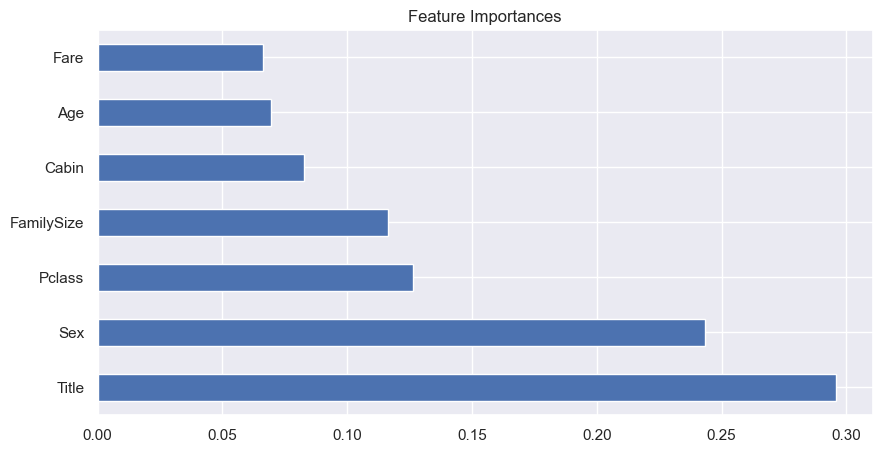

In [87]:
feature_importances = grid_search.best_estimator_.feature_importances_
features = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(len(feature_importances))]

pd.Series(feature_importances, index=features).sort_values(ascending=False).plot(kind='barh', figsize=(10,5))
plt.title("Feature Importances")
plt.show()

In [88]:
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred_best)*100)

Final Accuracy: 86.03351955307262
